<a href="https://colab.research.google.com/github/aayush-sharmaa/Credit-Card-Approval-ML-Model/blob/main/ML_Mid_Course_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Objective**

The goal of this project is to develop a machine learning model that can predict whether a credit card application will be approved or rejected based on various applicant features. This model aims to assist financial institutions in making efficient and accurate credit approval decisions.


**Define the Problem Statement**

**Objective:** To build a machine learning model that predicts whether an individual is eligible for a credit card based on various personal, financial, and demographic features.

**Industry:** Financial services

**Type of Problem:** Supervised learning (classification)

**Business Objective:** Streamline the credit card application process to reduce manual work and improve decision-making speed.


**Desired Outcome:** Develop a predictive model to accurately identify eligible individuals for credit cards, increasing approval efficiency and customer satisfaction.



**Contribution** - Individual

**Projected by** - Ayush Sharma

**Dataset Link :-** https://drive.google.com/file/d/1P2URqDfC5-hXZ_BOWsJjXiKmzK6FvOdJ/view?usp=sharing

**Github Link :-**

**Dataset Overview**

ID - An identifier for each individual (customer).

Gender -	The gender of the individual.

Own_car -	A binary feature indicating whether the individual owns a car.

Own_property -	A binary feature indicating whether the individual owns a property.

Work_phone - A binary feature indicating whether the individual has a work phone.

Phone -	A binary feature indicating whether the individual has a phone.

Email -	A binary feature indicating whether the individual has provided an email address.

Unemployed -	A binary feature indicating whether the individual is unemployed.

Num_children -	The number of children the individual has.

Num_family -	The total number of family members.

Account_length -	The length of the individual's account with a bank or financial institution.

Total_income -	The total income of the individual.

Age -	The age of the individual.

Years_employed -	The number of years the individual has been employed.

Income_type -	The type of income (e.g., employed, self-employed, etc.).

Education_type -	The education level of the individual.

Family_status -	The family status of the individual.

Housing_type -	The type of housing the individual lives in.

Occupation_type -	The type of occupation the individual is engaged in.

Target -	The target variable for the classification task, indicating whether the individual is eligible for a credit card or not (e.g., Yes/No, 1/0).

# Data Collection

In [62]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [63]:
# Load the dataset
df = pd.read_csv("/content/dataset.csv")

In [64]:
# Shape of the data
df.shape

(9709, 20)

In [65]:
# First view of the data
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


#Data Preprocessing

In [66]:
# Some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [67]:
# Statistical Summary for the Numerical Columns
df.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


In [68]:
# Drop the ID columns from the dataset
df.drop(["ID"],axis = 1, inplace = True)

In [69]:
# Finding Missing Values:
df.isna().sum()

Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

In [70]:
# Addressing Outliers:
col = 'Total_income'
quartiles = df[col].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]

upper_limit = quartiles[0.75] + 1.5 * iqr
lower_limit = quartiles[0.25] - 1.5 * iqr

df = df[(df['Total_income'] >= lower_limit) & (df['Total_income'] <= upper_limit)]

In [71]:
# Renaming tha columns
df.rename(mapper={
    'Gender': 'Is_Female',
    'Work_phone': 'Has_Work_Phone',
    'Phone': 'Has_Phone',
    'Email': 'Has_Email'
}, axis=1, inplace=True)

<ipython-input-71-b715206d0c98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(mapper={


In [72]:
# Encoding Categorical Variables:
label = LabelEncoder()
df['Income_type'] = label.fit_transform(df['Income_type'])
df['Education_type'] = label.fit_transform(df['Education_type'])
df['Family_status'] = label.fit_transform(df['Family_status'])
df['Housing_type'] = label.fit_transform(df['Housing_type'])
df['Occupation_type'] = label.fit_transform(df['Occupation_type'])

<ipython-input-72-2460b40bf797>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income_type'] = label.fit_transform(df['Income_type'])
<ipython-input-72-2460b40bf797>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education_type'] = label.fit_transform(df['Education_type'])
<ipython-input-72-2460b40bf797>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [73]:
# Data Transformation:
scaler = StandardScaler()
df[['Total_income','Age','Years_employed']] = scaler.fit_transform(df[['Total_income','Age','Years_employed']])

<ipython-input-73-bd0c63d1aed4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Total_income','Age','Years_employed']] = scaler.fit_transform(df[['Total_income','Age','Years_employed']])


In [74]:
# Handling Imbalanced Dataset
x = df.drop(["Target"],axis = 1)
y = df[["Target"]]
smot = SMOTE(sampling_strategy = 'minority')
x_sm, y_sm = smot.fit_resample(x, y)

df=pd.concat([x_sm,y_sm],axis = 1)

In [75]:
# Data Reduction
pca = PCA(0.95)
x_pca = pca.fit_transform(x)
pca.explained_variance_ratio_

array([0.90057365, 0.06031742])

# Exploratory Data Analysis (EDA) and Visulizations

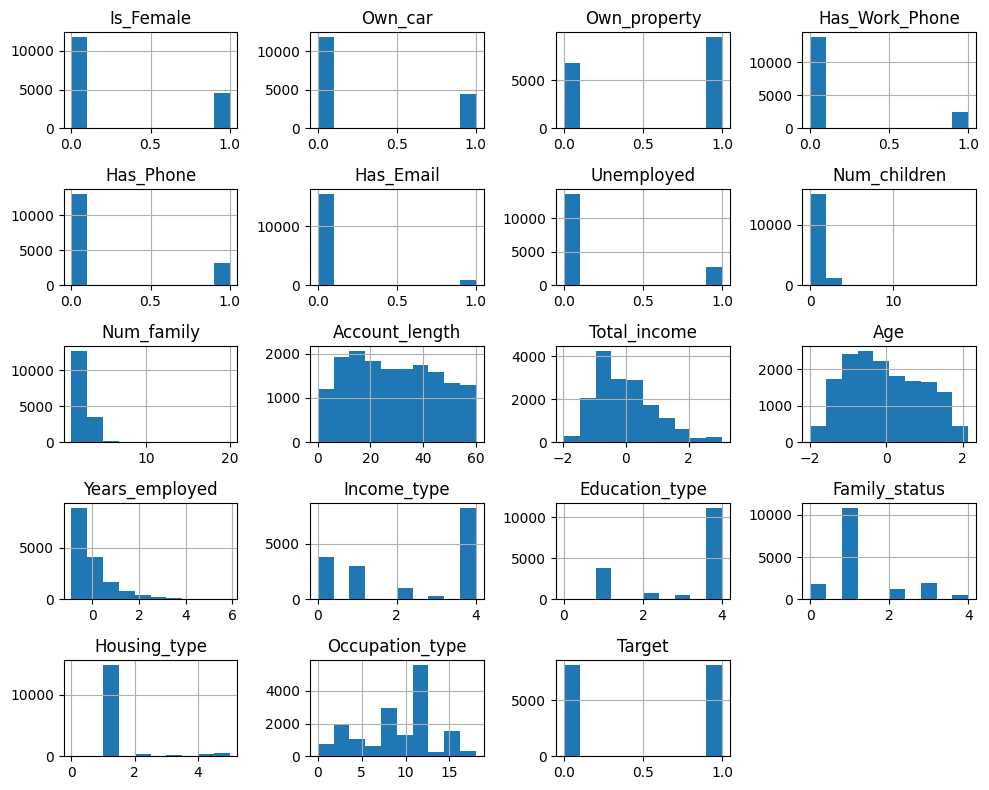

In [ ]:
# Distribution Analysis:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

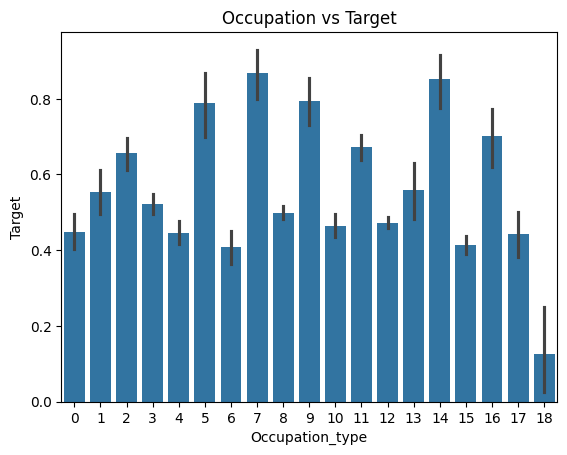

In [ ]:
# Bivariate Analysis:
sns.barplot(x = 'Occupation_type', y = 'Target', data = df)
plt.xlabel('Occupation_type')
plt.ylabel('Target')
plt.title('Occupation vs Target')
plt.show()

Text(0.5, 1.0, 'Age vs Income')

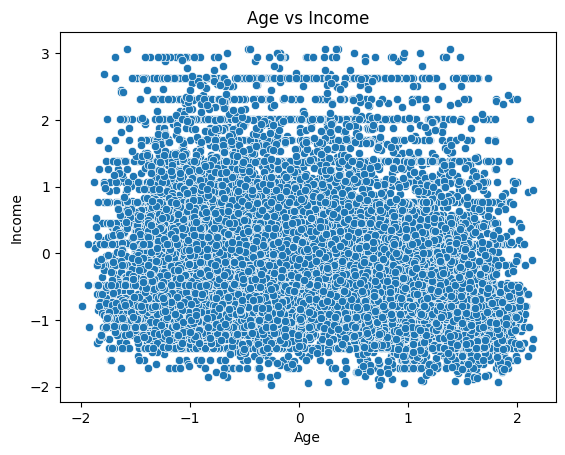

In [ ]:
# Relationship between Age and Income
sns.scatterplot(x = 'Age', y = 'Total_income', data = df)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')

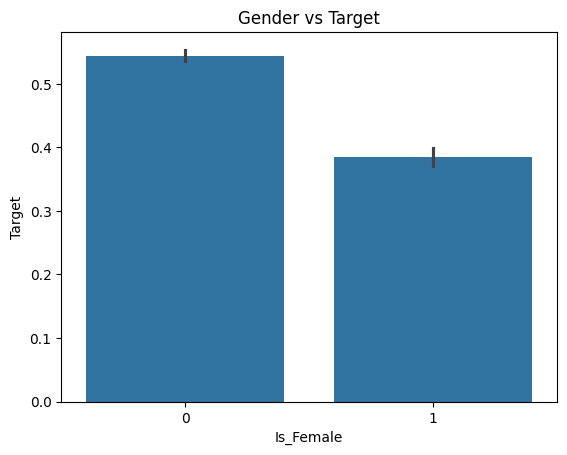

In [ ]:
#
sns.barplot(x = 'Is_Female', y = 'Target', data = df)
plt.xlabel('Is_Female')
plt.ylabel('Target')
plt.title('Gender vs Target')
plt.show()

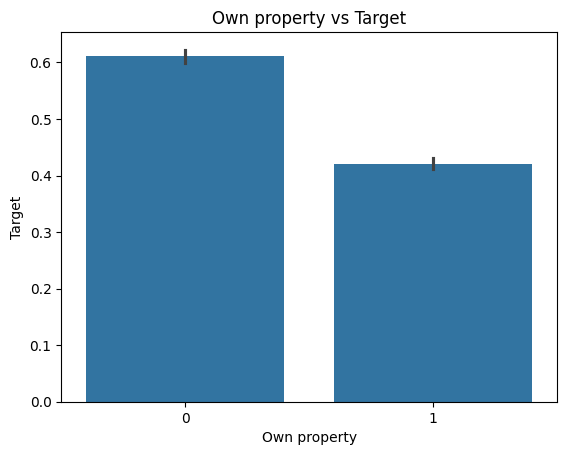

In [ ]:
sns.barplot(x = 'Own_property', y = 'Target', data = df)
plt.xlabel('Own property')
plt.ylabel('Target')
plt.title('Own property vs Target')
plt.show()

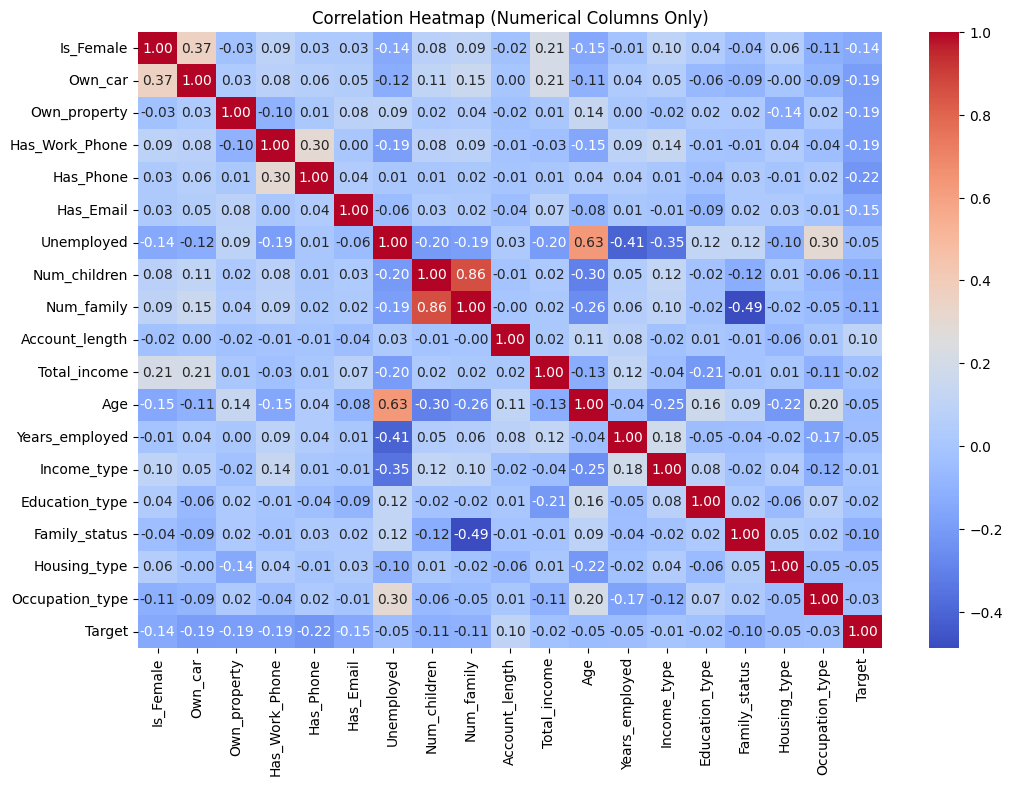

In [ ]:
# Multivariate Analysis & Feature Relationships:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
corr = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns Only)')
plt.show()

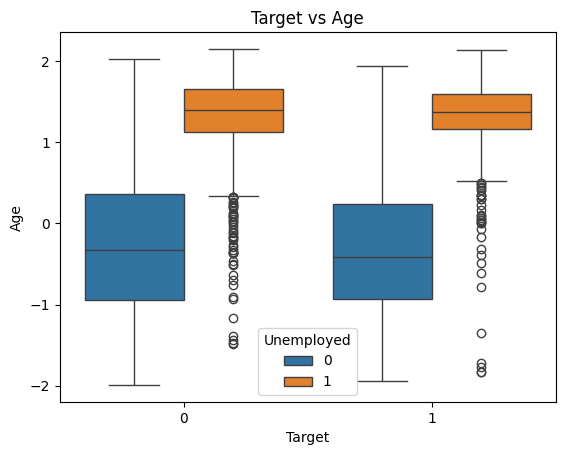

In [ ]:
# Central Tendancy of Age and Target
sns.boxplot(x = 'Target',y = 'Age', data = df,hue ='Unemployed' )
plt.xlabel('Target')
plt.ylabel('Age')
plt.title('Target vs Age')
plt.show()

# Model Selection, Training & Evaluation


In [76]:
# Spliting the data
x = df.drop(['Target'], axis=1)
y = df['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [90]:
# Model Hypertuning
param_dist = {
    'max_depth': [None,1,2,3,4,5],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(model, param_grid = param_dist, n_jobs=-1, cv=10)
grid.fit(x_test, y_test)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy']})

In [91]:
print(grid.best_params_)
grid.best_score_

{'criterion': 'entropy'}


0.6880133580983472

In [92]:
# Train the Model
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [93]:
# Accuracy of the model
model.score(x_test, y_test)

0.7548268464603126